In [1]:
import requests
import json
import time
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as  plt

/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df=pd.read_csv('./sample data/Metrics-2.csv')
df.head()

,Time,Requests_Sum
0,03/07/22 22:20,585
1,03/07/22 22:21,706
2,03/07/22 22:22,675
3,03/07/22 22:23,561
4,03/07/22 22:24,735


In [3]:
df['Time'] =  pd.to_datetime(df.pop('Time'), format='%d/%m/%y %H:%M')
df['ds'] = df['Time']
df['y'] = df['Requests_Sum']
train_df = df[4000:9080]
df.shape

(10080, 4)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -115.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10148.9    0.00304651        197.69           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10160.6   0.000423286       171.133           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10163.3    0.00693676         191.4      0.8686      0.8686      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       10164.2   9.85263e-05       128.868    5.17e-07       0.001      443  LS failed, Hessian reset 
     399       10166.1   2.75814e-05       73.6794      0.1803           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       10166.1   8.85588e-05    

/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


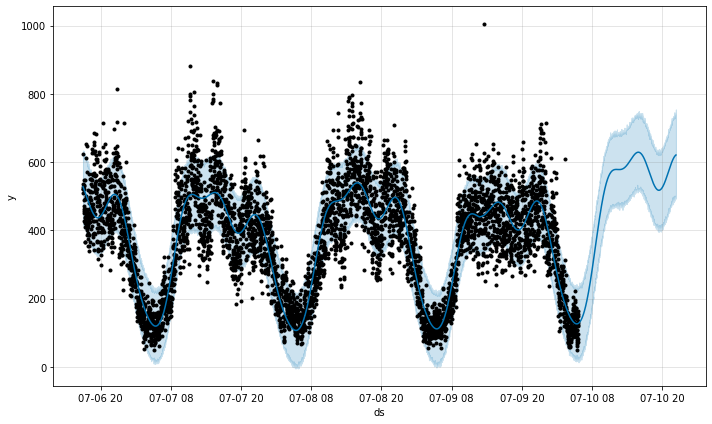

In [4]:
m = Prophet(seasonality_mode='multiplicative').fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='60s')
fcst = m.predict(future)
fig = m.plot(fcst)

In [5]:
y_df = pd.DataFrame()
y_df['yhat'] = fcst[-1000:]['yhat']

In [6]:
y_df['y'] = df[-1000:]['y']
y_df['yhat_lower'] = fcst[-1000:]['yhat_lower']
y_df['yhat_upper'] = fcst[-1000:]['yhat_upper']

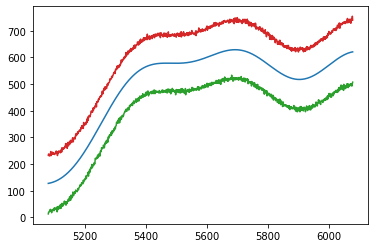

In [7]:
plt.plot(y_df)

In [8]:
fcst[-1000:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
5080,2022-07-10 05:40:00,410.469851,13.120877,233.403211,410.469851,410.469851,-0.689100,-0.689100,-0.689100,-0.689100,-0.689100,-0.689100,0.0,0.0,0.0,127.615245
5081,2022-07-10 05:41:00,410.543499,19.584548,237.908843,410.543499,410.543499,-0.688652,-0.688652,-0.688652,-0.688652,-0.688652,-0.688652,0.0,0.0,0.0,127.821734
5082,2022-07-10 05:42:00,410.617148,19.810195,234.894587,410.617148,410.617148,-0.688176,-0.688176,-0.688176,-0.688176,-0.688176,-0.688176,0.0,0.0,0.0,128.040168
5083,2022-07-10 05:43:00,410.690796,21.422519,230.497543,410.690796,410.690796,-0.687671,-0.687671,-0.687671,-0.687671,-0.687671,-0.687671,0.0,0.0,0.0,128.270621
5084,2022-07-10 05:44:00,410.764444,24.044286,236.512765,410.764444,410.764444,-0.687137,-0.687137,-0.687137,-0.687137,-0.687137,-0.687137,0.0,0.0,0.0,128.513164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,2022-07-10 22:15:00,483.749805,495.460594,744.199794,436.887214,530.839811,0.281791,0.281791,0.281791,0.281791,0.281791,0.281791,0.0,0.0,0.0,620.066378
6076,2022-07-10 22:16:00,483.823453,492.665677,739.814798,436.898875,530.996710,0.282126,0.282126,0.282126,0.282126,0.282126,0.282126,0.0,0.0,0.0,620.322687
6077,2022-07-10 22:17:00,483.897101,493.703677,740.905564,436.910537,531.153609,0.282429,0.282429,0.282429,0.282429,0.282429,0.282429,0.0,0.0,0.0,620.563695
6078,2022-07-10 22:18:00,483.970749,502.239349,754.626485,436.922198,531.310509,0.282700,0.282700,0.282700,0.282700,0.282700,0.282700,0.0,0.0,0.0,620.789276


In [9]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

In [10]:
def stan_init(m):
    """Retrieve parameters from a trained model.

    Retrieve parameters from a trained model in the format
    used to initialize a new Stan model.

    Parameters
    ----------
    m: A trained model of the Prophet class.

    Returns
    -------
    A Dictionary containing retrieved parameters of m.

    """
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        res[pname] = m.params[pname][0][0]
    for pname in ['delta', 'beta']:
        res[pname] = m.params[pname][0]
    return res

In [11]:
def fit_and_predict(df, periods=1000,frequency='60s',old_model_loc=None):
    response = {}
    old_model = None
    model = None
    new_model_loc = './serialized_model.json'
    try:
        if old_model_loc != None:
            with open(old_model_loc, 'r') as fin:
                old_model = model_from_json(fin.read())  # Load model
            model = Prophet(seasonality_mode='multiplicative').fit(df,init=stan_init(old_model))
        else:
            model = Prophet(seasonality_mode='multiplicative').fit(df)
        with open(new_model_loc, 'w') as fout:
            fout.write(model_to_json(model))  # Save model
        future = model.make_future_dataframe(periods=periods, freq=frequency)
        fcst = m.predict(future)
        response['status'] = 'success'
        response['model_location'] = new_model_loc
        response['result_df'] = fcst[-periods:]
    except Exception as e:
        print(e)
        response['status'] = 'failure'
    return(response)

In [12]:
s = fit_and_predict(df = train_df,old_model_loc='./serialized_model.json')

/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/serialize.py:136: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/hassanraha/.pyenv

Initial log joint probability = 10167.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       10167.4   4.87472e-07       73.7677    6.75e-09       0.001        9   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [13]:
stan_init(m)

{'k': -0.11287162668505368,
 'm': 0.3987931750404534,
 'sigma_obs': 0.08111755340098513,
 'delta': array([-2.46748658e-08,  2.41963292e-07,  6.48268053e-02, -3.82662069e-07,
        -1.14512322e-07, -5.72854315e-02, -1.79731983e-01, -3.36615917e-08,
         6.88979514e-08,  2.62957866e-02,  2.59039101e-01,  1.77735537e-07,
         1.37962249e-07,  1.54854969e-01,  4.08625776e-01,  2.73558354e-07,
        -2.73668873e-01, -3.91600487e-01, -1.99725816e-01,  7.01099116e-08,
        -1.99739452e-07,  5.24829558e-07,  8.00445850e-08, -1.10680886e-07,
         6.73069280e-01]),
 'beta': array([-0.41207238, -0.15713624, -0.0675776 ,  0.23056369,  0.02569178,
         0.06199004, -0.06005435, -0.00615474])}

In [14]:
with open('./serialized_model.json', 'r') as fin:
    old_model = model_from_json(fin.read())
    model = Prophet().fit(df,init=stan_init(old_model))

/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/serialize.py:136: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18245.7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       19642.3    0.00294821       422.423      0.3715      0.8566      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       19674.7    0.00426975       701.936           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       19677.3     0.0012658       216.647           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       19678.6   0.000590633       127.796   5.615e-06       0.001      519  LS failed, Hessian reset 
     399       19678.7   8.32049e-06       56.6078           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       19679.7    8.5476e-05    

In [21]:
type(df['y'].tolist())

list

In [22]:
df

,Requests_Sum,Time,ds,y
0,585,2022-07-03 22:20:00,2022-07-03 22:20:00,585
1,706,2022-07-03 22:21:00,2022-07-03 22:21:00,706
2,675,2022-07-03 22:22:00,2022-07-03 22:22:00,675
3,561,2022-07-03 22:23:00,2022-07-03 22:23:00,561
4,735,2022-07-03 22:24:00,2022-07-03 22:24:00,735
...,...,...,...,...
10075,446,2022-07-10 22:15:00,2022-07-10 22:15:00,446
10076,416,2022-07-10 22:16:00,2022-07-10 22:16:00,416
10077,401,2022-07-10 22:17:00,2022-07-10 22:17:00,401
10078,395,2022-07-10 22:18:00,2022-07-10 22:18:00,395
